In [11]:
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-163f9d5f-41c0-71fa-3c70-7af85eae6523)


In [12]:
!pip install torch torchvision torchaudio transformers diffusers accelerate

In [14]:
import accelerate
import torch
import diffusers
import transformers

In [15]:
from diffusers import StableVideoDiffusionPipeline

model_id = "stabilityai/stable-video-diffusion-img2vid"
pipe = StableVideoDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)

model_index.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

image_encoder/config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/391M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/6.10G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/986 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.53G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [16]:
pipe.enable_model_cpu_offload()

In [18]:
from diffusers.utils import load_image, export_to_video

In [20]:
image = load_image("diffusion.jpg")

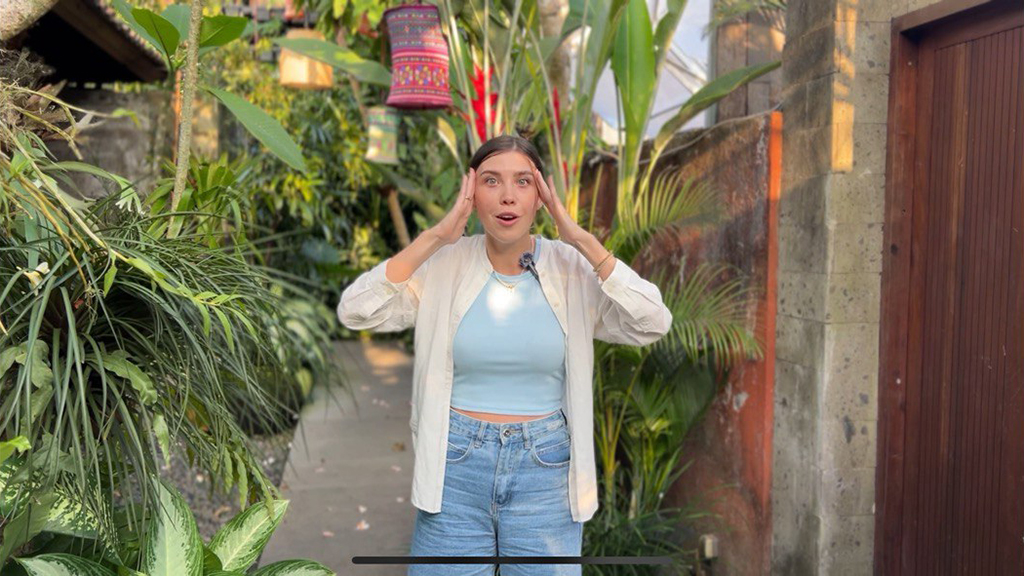

In [21]:
image

In [22]:
image.size

(1024, 576)

In [23]:
generator = torch.manual_seed(42)

In [27]:
frames = pipe(image, decode_chunk_size=8, generator=generator, num_inference_steps=48).frames[0]

  0%|          | 0/48 [00:00<?, ?it/s]

In [28]:
frames

[<PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>,
 <PIL.Image.Image image mode=RGB size=1024x576>]

In [30]:
export_to_video(frames, "diffusion.mp4", fps=8)

'diffusion.mp4'